In [1]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [0]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
os.chdir('/gdrive/My Drive/Projects/AMEX')

In [3]:
train = pd.read_csv('development_dataset.csv')
train.head(2)

,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,VAR8,VAR9,VAR10,VAR11,VAR12,VAR13,VAR14,VAR15,VAR16,VAR17,VAR18,VAR19,VAR20,VAR21
0,1,828.235294,0.138889,321.428571,625.911006,1.818182,1.081550,198.113469,NaN,58.632548,0.279273,100.083403,1.0,1,1.0,1.540594,NaN,1,0,100.104991,Low
1,2,911.764706,0.027778,NaN,611.574748,8.181818,1.344479,198.600020,22.086661,NaN,NaN,15.012510,NaN,1,NaN,1.614613,NaN,0,1,146.654045,High


In [4]:
test = pd.read_csv('leaderboard_dataset.csv')
test.head(2)

,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,VAR8,VAR9,VAR10,VAR11,VAR12,VAR13,VAR14,VAR15,VAR16,VAR17,VAR18,VAR19,VAR20
0,1,878.823529,0.833333,821.428571,620.835806,5.181818,0.833974,197.500187,NaN,58.632548,9.433609,40.033361,10.000000,2,10.0,1.212784,1000.00,1,0,48.099828
1,2,891.764706,0.138889,357.142857,614.092215,3.909091,0.595187,197.016843,253.896073,58.632548,10.144612,NaN,5.666667,1,7.6,1.004907,992.55,0,0,104.018933


In [0]:
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
def decimal(row):
  if row['VAR14']=='.':
    return 0
  else:
    return int(row['VAR14'])

train['VAR14'] = train.apply(decimal, axis=1)
test['VAR14'] = test.apply(decimal, axis=1)

In [0]:
drop = ['VAR1']
train.drop(drop,axis=1,inplace=True)
test.drop(drop,axis=1,inplace=True)

In [8]:
train.isnull().sum()/len(train)

VAR2     0.028265
VAR3     0.099559
VAR4     0.367471
VAR5     0.000029
VAR6     0.102794
VAR7     0.024559
VAR8     0.024559
VAR9     0.465206
VAR10    0.133824
VAR11    0.222500
VAR12    0.308882
VAR13    0.250647
VAR14    0.000000
VAR15    0.236000
VAR16    0.025471
VAR17    0.652765
VAR18    0.000000
VAR19    0.000000
VAR20    0.000000
VAR21    0.000000
dtype: float64

In [0]:
drop = ['VAR17','VAR9']
train.drop(drop,axis=1,inplace=True)
test.drop(drop,axis=1,inplace=True)

In [0]:
# train.fillna(train.mean(), inplace=True)
# test.fillna(test.mean(), inplace=True)


## Feature Engineering

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


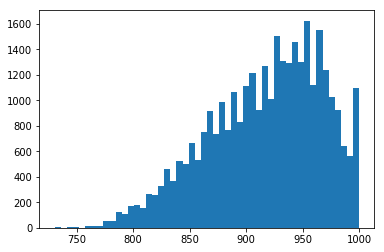

In [10]:
plt.hist(train['VAR2'],bins=50)
plt.show()

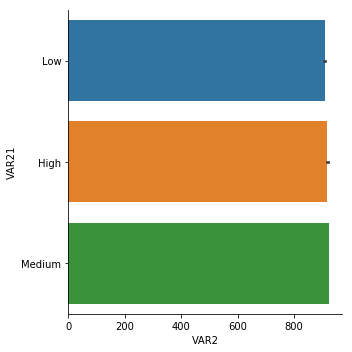

In [11]:
sns.catplot(x="VAR2", y="VAR21", kind="bar", data=train);

In [12]:
train[train['VAR2']>=950]['VAR21'].value_counts()

Medium    5993
Low       2981
High      1083
Name: VAR21, dtype: int64

In [0]:
train['VAR2_high'] = (train['VAR2']>950)
test['VAR2_high'] = (test['VAR2']>950)

In [0]:
# train['VAR6'] = train['VAR6'].fillna(train['VAR6'].median())
# test['VAR6'] = test['VAR6'].fillna(test['VAR6'].median())
# train['VAR19_6_mean'] = train.groupby(by='VAR19')['VAR6'].transform('mean')
# test['VAR19_6_mean'] = test.groupby(by='VAR19')['VAR6'].transform('mean')

In [0]:
# train['VAR6_adj'] = train['VAR6'] - train['VAR19_6_mean']
# test['VAR6_adj'] = test['VAR6'] - test['VAR19_6_mean']

In [0]:
train['VAR18_pos'] = (train['VAR18']>0)
test['VAR18_pos'] = (test['VAR18']>0)

In [17]:
train[train['VAR13']>=20]['VAR21'].value_counts()

Medium    2022
Low        917
High       525
Name: VAR21, dtype: int64

In [0]:

train['VAR13_high'] = (train['VAR13']>=20)
test['VAR13_high'] = (test['VAR13']>=20)

In [0]:
train['VAR_78'] = train['VAR7'] + train['VAR8']
test['VAR_78'] = test['VAR7'] + test['VAR8']

In [0]:
train['VAR_678'] = train['VAR_78']/train['VAR6']
test['VAR_678'] = test['VAR_78']/test['VAR6']

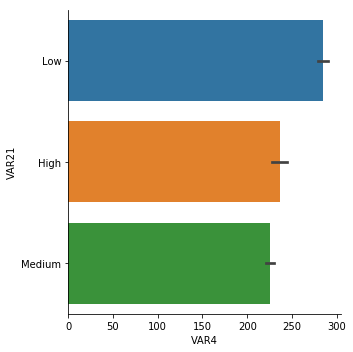

In [21]:
sns.catplot(x="VAR4", y="VAR21", kind="bar", data=train);

In [22]:
train['VAR4'].describe()

count    21506.000000
mean       248.076201
std        241.167723
min         18.928571
25%         71.428571
50%        142.857143
75%        357.142857
max       1000.000000
Name: VAR4, dtype: float64

In [0]:
train['VAR4_low'] = train['VAR4']<100
test['VAR4_low'] = test['VAR4']<100

In [0]:
train['VAR_678'] = train['VAR_78']/train['VAR6']
test['VAR_678'] = test['VAR_78']/test['VAR6']

In [0]:
# train['NOISE'] = np.random.rand(len(train),1)
# test['NOISE'] = np.random.rand(len(test),1)

In [0]:
# train['VAR21'] = train['VAR21'].astype('category')
# train['VAR21'] = train['VAR21'].cat.codes

d = {'Low':0, 'Medium':1, 'High':2}
inv = {0:'Low', 1:'Medium', 2:'High'}
train['VAR21'] = train['VAR21'].map(d)

# Splitting data

In [0]:
from sklearn.model_selection import train_test_split,KFold, cross_val_score

## Model

In [0]:
from fastai import *
from fastai.vision import *
from fastai.tabular import *


In [35]:
dep_var = 'VAR21'
cat_names = ['VAR2_high', 'VAR13_high', 'VAR18_pos', 'VAR19']
cont_names = [i for i in train.columns if i not in cat_names]
cont_names.remove(dep_var)
# cont_names.remove('VAR19_6_mean')
# cont_names.remove('VAR6_adj')



print("Categorical columns are : ", cat_names)
print('Continuous numerical columns are :', cont_names)
procs = [FillMissing, Categorify, Normalize]

Categorical columns are :  ['VAR2_high', 'VAR13_high', 'VAR18_pos', 'VAR19']
Continuous numerical columns are : ['VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6', 'VAR7', 'VAR8', 'VAR10', 'VAR11', 'VAR12', 'VAR13', 'VAR14', 'VAR15', 'VAR16', 'VAR18', 'VAR20', 'VAR_78', 'VAR_678', 'VAR4_low', 'VAR2_mean_VAR2_high', 'VAR2_adj', 'VAR2_mean_VAR13_high', 'VAR2_mean_VAR18_pos', 'VAR2_mean_VAR19', 'VAR3_mean_VAR2_high', 'VAR3_adj', 'VAR3_mean_VAR13_high', 'VAR3_mean_VAR18_pos', 'VAR3_mean_VAR19', 'VAR4_mean_VAR2_high', 'VAR4_adj', 'VAR4_mean_VAR13_high', 'VAR4_mean_VAR18_pos', 'VAR4_mean_VAR19', 'VAR5_mean_VAR2_high', 'VAR5_adj', 'VAR5_mean_VAR13_high', 'VAR5_mean_VAR18_pos', 'VAR5_mean_VAR19', 'VAR6_mean_VAR2_high', 'VAR6_adj', 'VAR6_mean_VAR13_high', 'VAR6_mean_VAR18_pos', 'VAR6_mean_VAR19', 'VAR7_mean_VAR2_high', 'VAR7_adj', 'VAR7_mean_VAR13_high', 'VAR7_mean_VAR18_pos', 'VAR7_mean_VAR19', 'VAR8_mean_VAR2_high', 'VAR8_adj', 'VAR8_mean_VAR13_high', 'VAR8_mean_VAR18_pos', 'VAR8_mean_VAR19', 'VAR10_mea

In [0]:
for i in cont_names:
  for j in cat_names:
    train[i] = train[i].fillna(train[i].median())
    test[i] = test[i].fillna(train[i].median())

    train[i+'_mean_'+j] = train.groupby(by=j)[i].transform('mean')
    test[i+'_mean_'+j] = test.groupby(by=j)[i].transform('mean')
    
    train[i+'_adj'] = train[i] - train[i+'_mean_'+j]
    test[i+'_adj'] = test[i] - test[i+'_mean_'+j]

In [31]:
train.head()

,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,VAR8,VAR10,VAR11,VAR12,VAR13,VAR14,VAR15,VAR16,VAR18,VAR19,VAR20,VAR21,VAR2_high,VAR18_pos,VAR13_high,VAR_78,VAR_678,VAR4_low,VAR2_mean_VAR2_high,VAR2_adj,VAR2_mean_VAR13_high,VAR2_mean_VAR18_pos,VAR2_mean_VAR19,VAR3_mean_VAR2_high,VAR3_adj,VAR3_mean_VAR13_high,VAR3_mean_VAR18_pos,VAR3_mean_VAR19,VAR4_mean_VAR2_high,VAR4_adj,VAR4_mean_VAR13_high,VAR4_mean_VAR18_pos,VAR4_mean_VAR19,VAR5_mean_VAR2_high,...,VAR14_mean_VAR2_high,VAR14_adj,VAR14_mean_VAR13_high,VAR14_mean_VAR18_pos,VAR14_mean_VAR19,VAR15_mean_VAR2_high,VAR15_adj,VAR15_mean_VAR13_high,VAR15_mean_VAR18_pos,VAR15_mean_VAR19,VAR16_mean_VAR2_high,VAR16_adj,VAR16_mean_VAR13_high,VAR16_mean_VAR18_pos,VAR16_mean_VAR19,VAR18_mean_VAR2_high,VAR18_adj,VAR18_mean_VAR13_high,VAR18_mean_VAR18_pos,VAR18_mean_VAR19,VAR20_mean_VAR2_high,VAR20_adj,VAR20_mean_VAR13_high,VAR20_mean_VAR18_pos,VAR20_mean_VAR19,VAR_78_mean_VAR2_high,VAR_78_adj,VAR_78_mean_VAR13_high,VAR_78_mean_VAR18_pos,VAR_78_mean_VAR19,VAR_678_mean_VAR2_high,VAR_678_adj,VAR_678_mean_VAR13_high,VAR_678_mean_VAR18_pos,VAR_678_mean_VAR19,VAR4_low_mean_VAR2_high,VAR4_low_adj,VAR4_low_mean_VAR13_high,VAR4_low_mean_VAR18_pos,VAR4_low_mean_VAR19
0,828.235294,0.138889,321.428571,625.911006,1.818182,1.081550,198.113469,58.632548,0.279273,100.083403,1.0,1,1.0,1.540594,1,0,100.104991,0,False,True,False,199.195019,109.557261,False,894.746887,-91.506105,916.223089,922.907335,919.741399,0.976318,-0.845952,0.965119,1.207263,0.984841,243.831779,126.013800,212.180892,196.356498,195.414771,634.090332,...,1.548260,-0.301223,1.511986,1.447829,1.301223,11.420918,-10.406650,9.962188,12.543820,11.406650,2.156879,-0.020964,1.951711,2.160290,1.561557,0.374264,0.612713,0.388754,1.215026,0.387287,166.882814,-53.836393,160.337533,173.030618,153.941384,202.287449,-0.909936,201.504905,202.494550,200.104956,31.160909,72.874001,34.19829,34.867387,36.683260,0.209456,-0.235398,0.221509,0.236823,0.235398
1,911.764706,0.027778,142.857143,611.574748,8.181818,1.344479,198.600020,58.632548,2.098360,15.012510,10.0,1,10.0,1.614613,0,1,146.654045,2,False,False,False,199.944499,24.437661,False,894.746887,-0.786636,916.223089,914.992494,912.551341,0.976318,-1.090870,0.965119,0.935126,1.118648,243.831779,-99.516550,212.180892,215.819051,242.373693,634.090332,...,1.548260,-1.048944,1.511986,1.561519,2.048944,11.420918,-2.975597,9.962188,11.545659,12.975597,2.156879,-1.655758,1.951711,2.027001,3.270372,0.374264,-0.430037,0.388754,0.000000,0.430037,166.882814,-32.163522,160.337533,155.625606,178.817567,202.287449,-6.473592,201.504905,201.737341,206.418090,31.160909,0.174524,34.19829,32.055590,24.263137,0.209456,-0.200316,0.221509,0.219109,0.200316
2,962.352941,0.833333,35.714286,615.825381,8.181818,0.720796,197.267767,58.632548,0.453212,210.175146,10.0,1,10.0,1.044599,0,0,98.249570,1,True,False,False,197.988563,24.198602,True,972.001474,42.611542,916.223089,914.992494,919.741399,1.139963,-0.151508,0.965119,0.935126,0.984841,127.465411,-159.700485,212.180892,215.819051,195.414771,625.573304,...,1.466541,-0.301223,1.511986,1.561519,1.301223,12.953642,-1.406650,9.962188,11.545659,11.406650,1.866154,-0.516959,1.951711,2.027001,1.561557,0.461370,-0.387287,0.388754,0.000000,0.387287,148.197980,-55.691815,160.337533,155.625606,153.941384,201.270499,-2.116393,201.504905,201.737341,200.104956,37.315269,-12.484658,34.19829,32.055590,36.683260,0.261808,0.764602,0.221509,0.219109,0.235398
3,892.941177,0.166667,142.857143,638.076431,9.090909,0.820218,197.355744,58.632548,2.098360,80.066722,10.0,1,10.0,1.145729,1,0,140.862306,0,False,True,False,198.175962,21.799356,False,894.746887,-26.800223,916.223089,922.907335,919.741399,0.976318,-0.818174,0.965119,1.207263,0.984841,243.831779,-52.557628,212.180892,196.356498,195.414771,634.090332,...,1.548260,-0.301223,1.511986,1.447829,1.301223,11.420918,-1.406650,9.962188,12.543820,11.406650,2.156879,-0.415828,1.951711,2.160290,1.561557,0.374264,0.612713,0.388754,1.215026,0.387287,166.882814,-13.079078,160.3

In [32]:
test.head(2)

,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,VAR8,VAR10,VAR11,VAR12,VAR13,VAR14,VAR15,VAR16,VAR18,VAR19,VAR20,VAR2_high,VAR18_pos,VAR13_high,VAR_78,VAR_678,VAR4_low,VAR2_mean_VAR2_high,VAR2_adj,VAR2_mean_VAR13_high,VAR2_mean_VAR18_pos,VAR2_mean_VAR19,VAR3_mean_VAR2_high,VAR3_adj,VAR3_mean_VAR13_high,VAR3_mean_VAR18_pos,VAR3_mean_VAR19,VAR4_mean_VAR2_high,VAR4_adj,VAR4_mean_VAR13_high,VAR4_mean_VAR18_pos,VAR4_mean_VAR19,VAR5_mean_VAR2_high,VAR5_adj,...,VAR14_mean_VAR2_high,VAR14_adj,VAR14_mean_VAR13_high,VAR14_mean_VAR18_pos,VAR14_mean_VAR19,VAR15_mean_VAR2_high,VAR15_adj,VAR15_mean_VAR13_high,VAR15_mean_VAR18_pos,VAR15_mean_VAR19,VAR16_mean_VAR2_high,VAR16_adj,VAR16_mean_VAR13_high,VAR16_mean_VAR18_pos,VAR16_mean_VAR19,VAR18_mean_VAR2_high,VAR18_adj,VAR18_mean_VAR13_high,VAR18_mean_VAR18_pos,VAR18_mean_VAR19,VAR20_mean_VAR2_high,VAR20_adj,VAR20_mean_VAR13_high,VAR20_mean_VAR18_pos,VAR20_mean_VAR19,VAR_78_mean_VAR2_high,VAR_78_adj,VAR_78_mean_VAR13_high,VAR_78_mean_VAR18_pos,VAR_78_mean_VAR19,VAR_678_mean_VAR2_high,VAR_678_adj,VAR_678_mean_VAR13_high,VAR_678_mean_VAR18_pos,VAR_678_mean_VAR19,VAR4_low_mean_VAR2_high,VAR4_low_adj,VAR4_low_mean_VAR13_high,VAR4_low_mean_VAR18_pos,VAR4_low_mean_VAR19
0,878.823529,0.833333,821.428571,620.835806,5.181818,0.833974,197.500187,58.632548,9.433609,40.033361,10.000000,2,10.0,1.212784,1,0,48.099828,False,True,False,198.33416,38.275013,False,894.473245,-41.806620,916.955156,923.617197,920.63015,1.038089,-0.231969,1.046925,1.256776,1.065303,241.924954,627.741782,210.023449,192.863696,193.68679,633.884243,-13.356126,...,1.563228,0.709964,1.513098,1.436697,1.290036,11.665038,-1.445247,10.052323,12.924484,11.445247,2.041507,-0.397410,1.86728,1.928868,1.610194,0.381672,0.616057,0.386802,1.225076,0.383943,166.863808,-105.073600,159.841062,169.140675,153.173428,202.11767,-1.875249,201.383203,201.781528,200.20941,32.51487,5.263376,34.957504,29.627669,33.011637,0.213494,-0.24043,0.224724,0.251988,0.24043
1,891.764706,0.138889,357.142857,614.092215,3.909091,0.595187,197.016843,58.632548,10.144612,80.066722,5.666667,1,7.6,1.004907,0,0,104.018933,False,False,False,197.61203,50.551915,False,894.473245,-28.865444,916.955156,915.399004,920.63015,1.038089,-0.926414,1.046925,1.058553,1.065303,241.924954,163.456068,210.023449,214.150234,193.68679,633.884243,-20.099717,...,1.563228,-0.290036,1.513098,1.570579,1.290036,11.665038,-3.845247,10.052323,11.668308,11.445247,2.041507,-0.605287,1.86728,1.998611,1.610194,0.381672,-0.383943,0.386802,0.000000,0.383943,166.863808,-49.154495,159.841062,157.063938,153.173428,202.11767,-2.597379,201.383203,201.807851,200.20941,32.51487,17.540277,34.957504,34.892625,33.011637,0.213494,-0.24043,0.224724,0.217088,0.24043


In [0]:
X_test = TabularList.from_df(test, cat_names=cat_names, cont_names=cont_names)

In [0]:
data = (TabularList.from_df(train, path='.',
                            cat_names=cat_names, 
                            cont_names=cont_names, 
                            procs=procs)
                        .split_by_rand_pct(valid_pct=0.2, seed=43)
                        .label_from_df(cols = dep_var)
                        .add_test(X_test)
                        .databunch())

In [37]:
data.show_batch(rows=5)

VAR2_high,VAR13_high,VAR18_pos,VAR19,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,VAR8,VAR10,VAR11,VAR12,VAR13,VAR14,VAR15,VAR16,VAR18,VAR20,VAR_78,VAR_678,VAR4_low,VAR2_mean_VAR2_high,VAR2_adj,VAR2_mean_VAR13_high,VAR2_mean_VAR18_pos,VAR2_mean_VAR19,VAR3_mean_VAR2_high,VAR3_adj,VAR3_mean_VAR13_high,VAR3_mean_VAR18_pos,VAR3_mean_VAR19,VAR4_mean_VAR2_high,VAR4_adj,VAR4_mean_VAR13_high,VAR4_mean_VAR18_pos,VAR4_mean_VAR19,VAR5_mean_VAR2_high,VAR5_adj,VAR5_mean_VAR13_high,VAR5_mean_VAR18_pos,VAR5_mean_VAR19,VAR6_mean_VAR2_high,VAR6_adj,VAR6_mean_VAR13_high,VAR6_mean_VAR18_pos,VAR6_mean_VAR19,VAR7_mean_VAR2_high,VAR7_adj,VAR7_mean_VAR13_high,VAR7_mean_VAR18_pos,VAR7_mean_VAR19,VAR8_mean_VAR2_high,VAR8_adj,VAR8_mean_VAR13_high,VAR8_mean_VAR18_pos,VAR8_mean_VAR19,VAR10_mean_VAR2_high,VAR10_adj,VAR10_mean_VAR13_high,VAR10_mean_VAR18_pos,VAR10_mean_VAR19,VAR11_mean_VAR2_high,VAR11_adj,VAR11_mean_VAR13_high,VAR11_mean_VAR18_pos,VAR11_mean_VAR19,VAR12_mean_VAR2_high,VAR12_adj,VAR12_mean_VAR13_high,VAR12_mean_VAR18_pos,VAR12_mean_VAR19,VAR13_mean_VAR2_high,VAR13_adj,VAR13_mean_VAR13_high,VAR13_mean_VAR18_pos,VAR13_mean_VAR19,VAR14_mean_VAR2_high,VAR14_adj,VAR14_mean_VAR13_high,VAR14_mean_VAR18_pos,VAR14_mean_VAR19,VAR15_mean_VAR2_high,VAR15_adj,VAR15_mean_VAR13_high,VAR15_mean_VAR18_pos,VAR15_mean_VAR19,VAR16_mean_VAR2_high,VAR16_adj,VAR16_mean_VAR13_high,VAR16_mean_VAR18_pos,VAR16_mean_VAR19,VAR18_mean_VAR2_high,VAR18_adj,VAR18_mean_VAR13_high,VAR18_mean_VAR18_pos,VAR18_mean_VAR19,VAR20_mean_VAR2_high,VAR20_adj,VAR20_mean_VAR13_high,VAR20_mean_VAR18_pos,VAR20_mean_VAR19,VAR_78_mean_VAR2_high,VAR_78_adj,VAR_78_mean_VAR13_high,VAR_78_mean_VAR18_pos,VAR_78_mean_VAR19,VAR_678_mean_VAR2_high,VAR_678_adj,VAR_678_mean_VAR13_high,VAR_678_mean_VAR18_pos,VAR_678_mean_VAR19,VAR4_low_mean_VAR2_high,VAR4_low_adj,VAR4_low_mean_VAR13_high,VAR4_low_mean_VAR18_pos,VAR4_low_mean_VAR19,target
True,True,True,0,1.6657,0.0450,-0.6929,0.6801,0.1229,0.2804,0.4721,0.4818,0.7354,0.7258,0.8903,0.4070,0.7731,0.4701,0.8789,-0.2985,0.4199,-0.0552,1.8485,1.5463,1.6258,2.9626,1.4243,0.6506,1.5463,0.0480,2.9626,1.4243,-0.6506,-1.5463,-0.6260,-2.9626,-1.4243,-0.6506,-1.5463,0.6005,-2.9626,1.4243,0.6506,1.5463,0.1758,2.9626,1.4243,-0.6506,-1.5463,0.3576,2.9626,1.4243,-0.6506,-1.5463,0.5889,2.9626,1.4243,-0.6506,1.5463,0.3415,-2.9626,1.4243,0.6506,-1.5463,0.7825,2.9626,1.4243,-0.6506,1.5463,0.7396,2.9626,1.4243,-0.6506,1.5463,0.9315,2.9626,1.4243,-0.6506,-1.5463,0.6237,2.9626,-1.4243,-0.6506,1.5463,0.8190,2.9626,1.4243,-0.6506,-1.5463,0.5349,2.9626,1.4243,-0.6506,1.5463,0.8978,2.9626,1.4243,-0.6506,-1.5463,-0.2398,2.9626,1.4243,-0.6506,-1.5463,0.5279,2.9626,1.4243,-0.6506,1.5463,-0.0657,-2.9626,1.4243,0.6506,1.5463,1.8250,2.9625,1.4243,0.6506,2
False,True,False,0,-0.6391,-0.0388,-0.3329,-0.5983,0.1229,-0.1569,-0.2579,0.0858,0.9110,0.9220,0.9836,-0.4425,0.8598,-0.1313,-0.5886,-0.4484,-0.2313,-0.0571,-0.5410,-0.6467,-0.6837,2.9626,-0.7021,0.6506,-0.6467,-0.0358,2.9626,-0.7021,-0.6506,0.6467,-0.2640,-2.9626,0.7021,-0.6506,0.6467,-0.6893,-2.9626,-0.7021,0.6506,-0.6467,0.1758,2.9626,-0.7021,-0.6506,0.6467,-0.0826,2.9626,-0.7021,-0.6506,0.6467,-0.1511,2.9626,-0.7021,-0.6506,-0.6467,-0.0669,-2.9626,-0.7021,0.6506,0.6467,0.9584,2.9626,-0.7021,-0.6506,-0.6467,0.9358,2.9626,-0.7021,-0.6506,-0.6467,1.0250,2.9626,-0.7021,-0.6506,0.6467,-0.2653,2.9626,0.7021,-0.6506,-0.6467,0.9059,2.9626,-0.7021,-0.6506,0.6467,-0.0692,2.9626,-0.7021,-0.6506,-0.6467,-0.5701,2.9626,-0.7021,-0.6506,0.6467,-0.3905,2.9626,-0.7021,-0.6506,0.6467,-0.1311,2.9626,-0.7021,-0.6506,-0.6467,-0.0676,-2.9626,-0.7021,0.6506,-0.6467,-0.5664,2.9625,-0.7021,0.6506,0
False,False,False,1,-0.5441,-0.0178,-0.3329,-0.2847,-0.1209,0.0022,-0.0391,-0.3786,2.4298,-0.2551,0.2774,2.1060,0.2038,0.0450,-0.5886,-0.5230,-0.0226,-0.0376,-0.5410,-0.6467,-0.4430,-0.3375,-0.7021,-1.5369,-0.6467,-0.0249,-0.3375,-0.7021,1.5369,0.6467,-0.5020,0.3375,0.7021,1.5369,0.6467,-0.0848,0.3375,-0.7021,-1.5369,-0.6467,-0.2453,-0.3375,-0.7021,1.5369,0.6467,-0.1758,-0.

In [0]:
learn = tabular_learner(data, layers=[1000, 500], metrics=accuracy, emb_drop=0.2, callback_fns=ShowGraph)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 3.98E-04
Min loss divided by 10: 4.79E-05


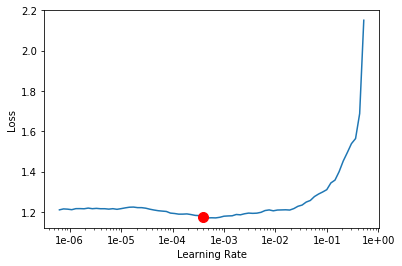

In [52]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

epoch,train_loss,valid_loss,accuracy,time
0,0.974374,0.974211,0.540294,00:05
1,0.953670,0.944669,0.547794,00:05
2,0.910540,0.908515,0.552206,00:05
3,0.877221,0.901409,0.563529,00:05
4,0.880808,0.895879,0.566176,00:05


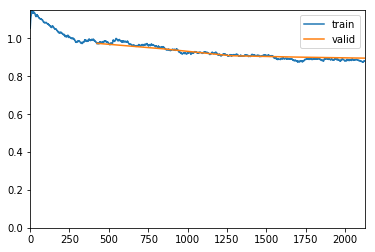

In [54]:
learn.fit_one_cycle(5, max_lr=slice(5e-3))

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 7.59E-07
Min loss divided by 10: 2.29E-07


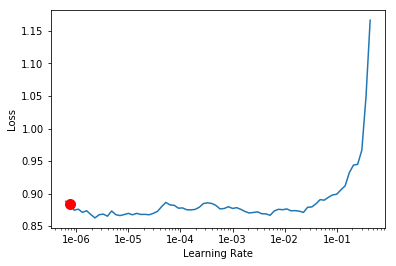

In [55]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

epoch,train_loss,valid_loss,accuracy,time
0,0.874169,0.900022,0.563824,00:05
1,0.876554,0.895022,0.562794,00:05
2,0.894830,0.902893,0.565735,00:05
3,0.868031,0.900950,0.565441,00:05
4,0.880877,0.899126,0.566471,00:05


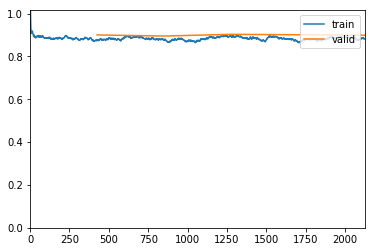

In [56]:
learn.fit_one_cycle(5, max_lr=slice(1e-6))

In [57]:
preds, targets = learn.get_preds()
predictions = np.argmax(preds, axis = 1)
pd.crosstab(predictions, targets)

col_0,0,1,2
row_0,,,
0,554,374,73
1,1844,3285,648
2,0,9,13


In [0]:
predictions, *_ = learn.get_preds(DatasetType.Test)
labels = np.argmax(predictions, 1)

In [0]:
 def create_submission(labels, version):
  sub = pd.read_csv('leaderboard_dataset.csv')
  sub['VAR21'] = labels
  sub = sub[['VAR1','VAR21']]
  sub['VAR21'] = sub['VAR21'].map(inv)
  sub.to_csv('MiningWaley_IITDhanbad_'+str(version)+'.csv', index=False,header=False)
  return sub


In [0]:
sub = create_submission(labels, 16)
sub.head()

In [0]:
sub['VAR21'].value_counts()

In [0]:
learn.save('nn_57')

In [0]:
np.save('nn_56.npy', predictions)